In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('poster')

In [6]:
number_of_red_cards = np.arange(0,21,1)

In [5]:
option_B = np.array([15,19,23,25,27,29,30,31,33,35])

In [22]:
n_simulations = int(1e5)
results_A = []
results_B = []
record = []
for pick_of_B in option_B:
    temp_results_A = []
    temp_results_B = []
    temp_record = []
    for n_simulation in range(n_simulations):
        number_of_red_card = np.random.choice(
            number_of_red_cards,size=1,)[0]
        temp_record.append(number_of_red_card)
        deck_of_cards = np.concatenate([['black']*(20-number_of_red_card),
                         ['red']*number_of_red_card])
        for _ in range(100):
            np.random.shuffle(deck_of_cards)
        bet = np.random.choice(['black','red'],size=1,)[0]
        draw = np.random.choice(deck_of_cards,
                               size=1,)[0]
        if bet == draw:
            temp_results_A.append(60)
        else:
            temp_results_A.append(0)
        temp_results_B.append(pick_of_B)
    results_A.append(temp_results_A)
    results_B.append(temp_results_B)
    record.append(temp_record)

In [26]:
np.mean(results_A,axis=1),np.mean(results_B,axis=1)

(array([29.9532, 29.955 , 30.1632, 29.9466, 29.9184, 30.0258, 30.0036,
        30.1164, 30.0402, 29.9802]),
 array([15., 19., 23., 25., 27., 29., 30., 31., 33., 35.]))

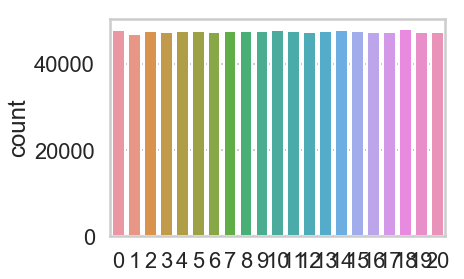

In [30]:
sns.countplot(np.concatenate(record))

Seems like option A returns around 29 to 31, so anything that is higher than 31 in option B is a better bet.